In [155]:
import numpy as np
import hiive.mdptoolbox
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example
from gym.envs.toy_text.frozen_lake import generate_random_map

size = 4
random_map_s = ['SFFF','FFFH','HFFF','HFFG']

P_FL_s, R_FL_s = hiive.mdptoolbox.example.openai('FrozenLake-v1', desc=random_map_s, map_name="4x4", is_slippery=True)

In [165]:
vi_s = mdp.ValueIteration(P_FL_s, R_FL_s, 0.99)
vi_s.run()
print('The optimal policy function:', vi_s.policy)
print('The number of iterations taken to complete the computation. :',vi_s.iter)
print('The amount of CPU time used to run the algorithm :',vi_s.time)

The optimal policy function: (1, 2, 0, 3, 3, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0)
The number of iterations taken to complete the computation. : 35
The amount of CPU time used to run the algorithm : 0.006159782409667969


Random map :
[['SFFF']
 ['FFFH']
 ['HFFF']
 ['HFFG']]
Optimal value function :
[[0.6891044  0.7222229  0.72800788 0.68129638]
 [0.70195374 0.75984382 0.77686534 0.        ]
 [0.         0.82130205 0.88268009 0.93031375]
 [0.         0.85835105 0.93031375 0.        ]]


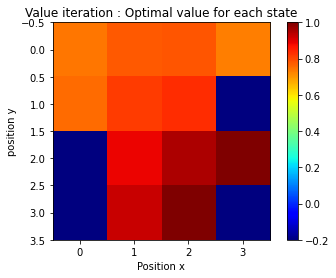

In [166]:
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_s = list(vi_s.V)
list_Z = []
for i in range(len(value_s)):
    list_Z.append(value_s[i]/max(value_s))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,size))

print('Random map :')
print(np.reshape(random_map_s,(size,1)))
print('Optimal value function :')
print(np.reshape(vi_s.V,(size,size)))

# plot
fig, ax = plt.subplots()
ax.set_title('Value iteration : Optimal value for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

Optimal policy :
[[1 2 0 3]
 [3 2 0 0]
 [0 2 1 1]
 [0 2 2 0]]


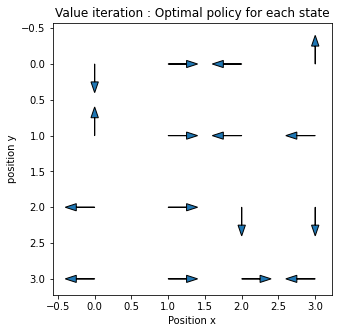

In [167]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_s =  np.reshape(vi_s.policy,(size,size))
print('Optimal policy :')
print(ar_s)
fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        plot1 = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

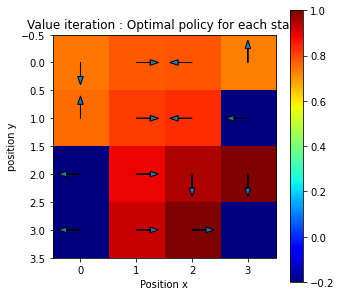

In [168]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

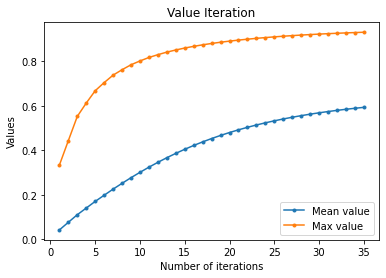

In [169]:
list_meanV_VI_s = []
list_maxV_VI_s = []
list_iteration_VI_s = []
for i in range(len(vi_s.run_stats)):
    list_meanV_VI_s.append(vi_s.run_stats[i].get('Mean V'))
    list_maxV_VI_s.append(vi_s.run_stats[i].get('Max V'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_VI_s, list_meanV_VI_s, marker ='.', label="Mean value")
ax.plot(list_iteration_VI_s, list_maxV_VI_s, marker=".", label="Max value")
ax.legend()
plt.show()

In [170]:
pi_s = mdp.PolicyIteration(P_FL_s, R_FL_s, 0.99)
pi_s.run()
print('The number of iterations taken to complete the computation. :',pi_s.iter)
print('The amount of CPU time used to run the algorithm :',pi_s.time)

The number of iterations taken to complete the computation. : 5
The amount of CPU time used to run the algorithm : 0.005206108093261719


Random map :
[['SFFF']
 ['FFFH']
 ['HFFF']
 ['HFFG']]
Optimal value function :
[[0.80017827 0.817415   0.8209394  0.79679412]
 [0.80718937 0.83866076 0.84934075 0.        ]
 [0.         0.87464048 0.91415969 0.94777019]
 [0.         0.89760526 0.94777019 0.        ]]


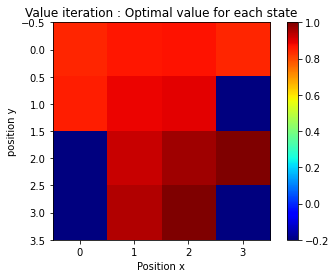

In [171]:
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_s = list(pi_s.V)
list_Z = []
for i in range(len(value_s)):
    list_Z.append(value_s[i]/max(value_s))
    if list_Z[i]==0:
        list_Z[i]= -0.2
list_Z_norm = np.reshape(list_Z,(size,size))

print('Random map :')
print(np.reshape(random_map_s,(size,1)))
print('Optimal value function :')
print(np.reshape(pi_s.V,(size,size)))

# plot
fig, ax = plt.subplots()
ax.set_title('Value iteration : Optimal value for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

Optimal policy :
[[1 2 0 3]
 [3 2 0 0]
 [0 2 1 1]
 [0 2 2 0]]


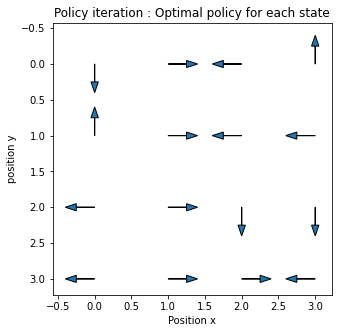

In [172]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_s =  np.reshape(pi_s.policy,(size,size))
print('Optimal policy :')
print(ar_s)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Policy iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        plot1 = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

[[1 2 0 3]
 [3 2 0 0]
 [0 2 1 1]
 [0 2 2 0]]


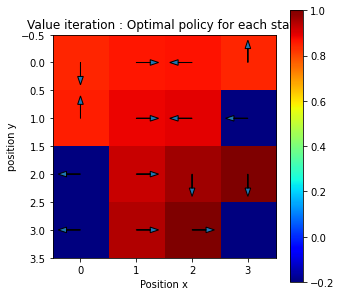

In [173]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_s =  np.reshape(vi_s.policy,(size,size))
print(ar_s)
fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_s):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

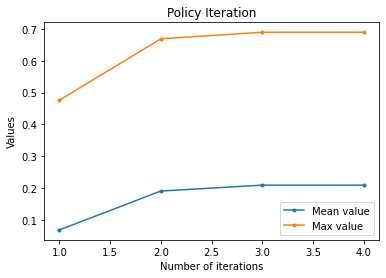

In [152]:
list_meanV_PI_s = []
list_maxV_PI_s = []
list_iteration_PI_s = []
for i in range(len(pi_s.run_stats)):
    list_meanV_PI_s.append(pi_s.run_stats[i].get('Mean V'))
    list_maxV_PI_s.append(pi_s.run_stats[i].get('Max V'))
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_PI_s, list_meanV_PI_s, marker ='.', label="Mean value")
ax.plot(list_iteration_PI_s, list_maxV_PI_s, marker=".", label="Max value")
ax.legend()
plt.show()

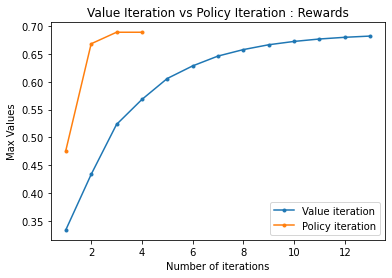

In [153]:
# Value iteration vs policy iteration : Max value
list_maxV_VI_s = []
list_maxV_PI_s = []
list_iteration_VI_s = []
list_iteration_PI_s = []
for i in range(len(pi_s.run_stats)):
    list_maxV_PI_s.append(pi_s.run_stats[i].get('Max V'))
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))

for i in range(len(vi_s.run_stats)):
    list_maxV_VI_s.append(vi_s.run_stats[i].get('Max V'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))
    
fig, ax = plt.subplots()
ax.set_title('Value Iteration vs Policy Iteration : Rewards')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Values')
ax.plot(list_iteration_VI_s, list_maxV_VI_s, marker ='.', label="Value iteration")
ax.plot(list_iteration_PI_s, list_maxV_PI_s, marker=".", label="Policy iteration")
ax.legend()
plt.show()

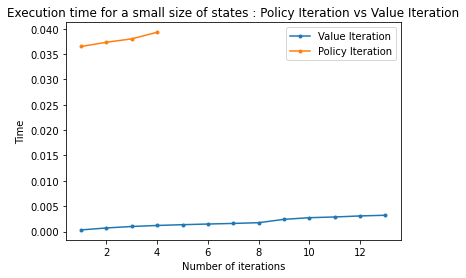

In [154]:
list_time_VI_s = []
list_time_PI_s = []
list_iteration_PI_s = []
list_iteration_VI_s = []
for i in range(len(vi_s.run_stats)):
    list_time_VI_s.append(vi_s.run_stats[i].get('Time'))
    list_iteration_VI_s.append(vi_s.run_stats[i].get('Iteration'))
    
for i in range(len(pi_s.run_stats)):
    list_iteration_PI_s.append(pi_s.run_stats[i].get('Iteration'))
    list_time_PI_s.append(pi_s.run_stats[i].get('Time'))

fig, ax = plt.subplots()
ax.set_title('Execution time for a small size of states : Policy Iteration vs Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
ax.plot(list_iteration_VI_s, list_time_VI_s, marker ='.', label="Value Iteration")
ax.plot(list_iteration_PI_s, list_time_PI_s, marker=".", label="Policy Iteration")
ax.legend()
plt.show()

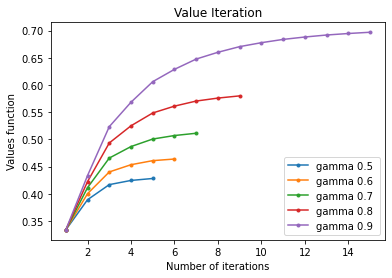

In [140]:
# Value function vs number of iteration and we vary gamma from 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_FL_s, R_FL_s, 0.5+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_maxV_VI[i].append(vi_s.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values function')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_maxV_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

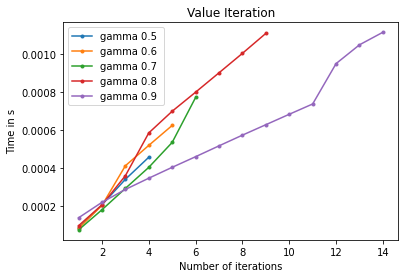

In [89]:
# Execution time vs number of iteration and we vary gamma and we vary gamma from 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_FL_s, R_FL_s, 0.5+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_time_VI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

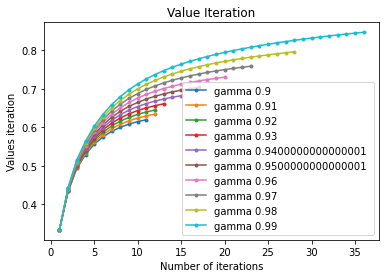

In [98]:
# value function vs number of iterations and we vary gamma from 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_maxV_VI = [[]for i in range(n_gamma)]
list_iterations_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_FL_s, R_FL_s, 0.9+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_maxV_VI[i].append(vi_s.run_stats[j].get('Max V'))
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values iteration')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_maxV_VI[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

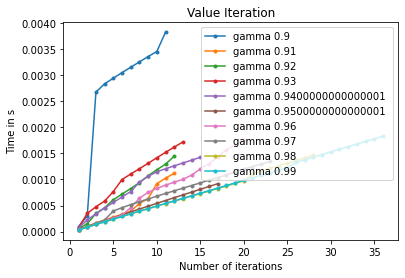

In [99]:
# execution time vs number of iterations and we vary gamma from 0.9 to 0.99

n_gamma = 10
delta_gamma = 0.01
list_iterations_VI=[[]for i in range(n_gamma)]
list_time_VI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    vi_s = mdp.ValueIteration(P_FL_s, R_FL_s, 0.9+i*delta_gamma)
    vi_s.run()
    for j in range(len(vi_s.run_stats)):
        list_iterations_VI[i].append(vi_s.run_stats[j].get('Iteration'))
        list_time_VI[i].append(vi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time in s')
for i in range(n_gamma):
    ax.plot(list_iterations_VI[i], list_time_VI[i], marker=".", label='gamma {} '.format(0.9+i*delta_gamma))
ax.legend()
plt.show()

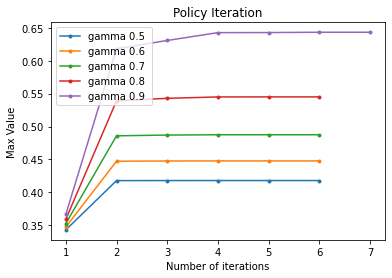

In [101]:
# policy : max value vs number of iterations and we vary gamma from 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_maxV_PI = [[]for i in range(n_gamma)]
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_s = mdp.PolicyIteration(P_FL_s, R_FL_s, 0.5+i*delta_gamma)
    pi_s.run()
    for j in range(len(pi_s.run_stats)):
        list_maxV_PI[i].append(pi_s.run_stats[j].get('Max V'))
        list_iterations_PI[i].append(pi_s.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Value')
for i in range(n_gamma):
    ax.plot(list_iterations_PI[i], list_maxV_PI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()

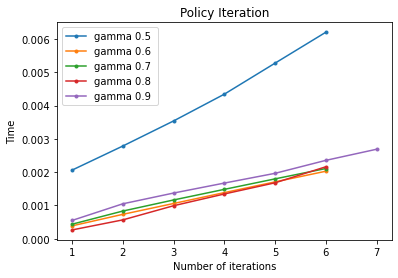

In [102]:
# policy : max value  vs number of iterations and we vary gamma from 0.5 to 0.9

n_gamma = 5
delta_gamma = 0.1
list_iterations_PI=[[]for i in range(n_gamma)]
list_time_PI=[[]for i in range(n_gamma)]


for i in range(n_gamma):
    pi_s = mdp.PolicyIteration(P_FL_s, R_FL_s, 0.5+i*delta_gamma)
    pi_s.run()
    for j in range(len(pi_s.run_stats)):
        list_iterations_PI[i].append(pi_s.run_stats[j].get('Iteration'))
        list_time_PI[i].append(pi_s.run_stats[j].get('Time'))
        
fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
for i in range(n_gamma):
    ax.plot(list_iterations_PI[i], list_time_PI[i], marker=".", label='gamma {} '.format(0.5+i*delta_gamma))
ax.legend()
plt.show()